In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Data load 
df = pd.read_csv(r"E:\Udemy Ml Project\cancer_cell_detection\data\raw\Cancer_Data.csv")

# Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Diagnosis encode 
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# X aur y define 
X = df.drop('diagnosis', axis=1) #  all features excepted target
y = df['diagnosis']              # only Target column

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (455, 30)
Testing data size: (114, 30)


In [ ]:
scaler = StandardScaler()

# Train data par fit aur transform 
X_train_scaled = scaler.fit_transform(X_train)

# Test data ko sirf transform
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model initialize aur train 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction 
y_pred = model.predict(X_test_scaled)

# Results check 
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



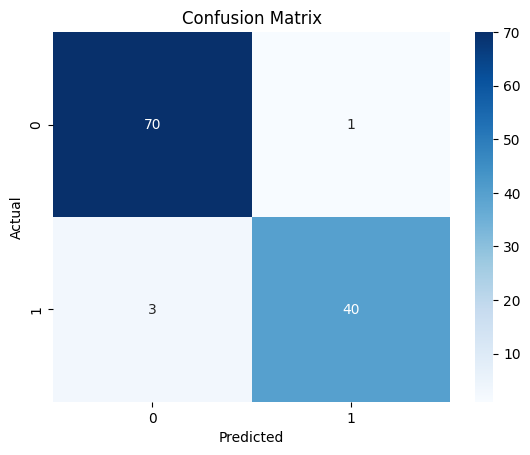

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import pickle

# do save the model
with open('cancer_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# 2. Scaler ko bhi save krne ke liye
# Kyunki naye data ko bhi usi tarah scale karna padega
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model aur Scaler both save ")

Model aur Scaler both save 
